In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lifetimes

In [7]:
plt.rcParams['figure.dpi'] = 140
sns.set(font='IPAGothic')

df = pd.read_csv('ecom_cosmetics_cart_purchase_labels.csv')
df = df[df['purchased'] == 1]

In [8]:
from lifetimes.utils import summary_data_from_transaction_data
summary_df = summary_data_from_transaction_data(
df,
'user_id',
'event_time')

from lifetimes import BetaGeoFitter

bgf_model = BetaGeoFitter(penalizer_coef=0.0)

bgf_model.fit(summary_df['frequency'],
             summary_df['recency'],
             summary_df['T'])

<lifetimes.BetaGeoFitter: fitted with 43397 subjects, a: 0.15, alpha: 29.65, b: 0.68, r: 0.27>

<AxesSubplot:title={'center':'将来の購入見込数'}, xlabel='購入日数', ylabel='年齢(最初に購入してから現在までの日数)'>

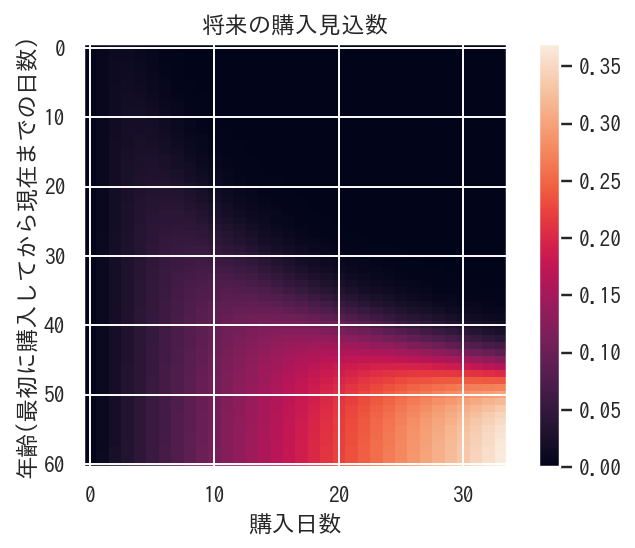

In [9]:
import matplotlib
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf_model,
                                 title="将来の購入見込数",
    xlabel="購入日数",
    ylabel="年齢(最初に購入してから現在までの日数)")